In [1]:
import os
import glob
import codecs
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate



Questionnaire results


/Users/human/.local/share/virtualenvs/nirs-analysis-cPFDHTrY/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,trial_count,image_name,q1,q2,q3,q4,q5,q6,q7,q8,q9
0,1,0713_1.jpg,5,5,5,5,5,4,5,5,3
1,2,0713_2.jpg,3,3,3,3,3,3,3,2,3
2,3,0713_3.jpg,2,2,3,2,3,3,3,2,1
3,4,0713_4.jpg,2,2,3,2,3,3,2,2,2
4,5,0713_5.jpg,4,4,4,4,4,4,4,4,4
5,6,0713_6.jpg,5,5,5,5,5,3,5,5,4
6,7,0713_7.jpg,3,4,4,4,4,3,3,3,3
7,8,0713_8.jpg,2,1,2,2,2,2,3,2,1
8,9,0713_9.jpg,1,1,3,2,2,3,2,1,1
9,10,0713_10.jpg,4,4,4,4,4,4,4,4,4




Marker indexes -> [   63  1317  2484  3608  4769  5895  7046  8171  9357 10470]


Oxy-Hb data


,time,trial_count,trial_category,ch-1,ch-2,ch-3,ch-4,ch-5,ch-6,ch-7,...,ch-13,ch-14,ch-15,ch-16,ch-17,ch-18,ch-19,ch-20,ch-21,ch-22
0,0.000,0,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.150,0,,-0.010916,0.003867,0.006667,0.003237,0.002989,0.004922,0.004623,...,0.008919,0.003507,0.005177,0.002709,0.007292,0.003441,0.003417,0.008807,0.006464,0.002820
2,0.300,0,,0.001431,0.003377,0.007147,0.003741,0.002111,0.003658,0.005710,...,0.010347,0.002795,0.005039,0.005042,0.006374,0.002175,0.002802,0.010716,0.006633,0.002474
3,0.450,0,,-0.002045,0.001742,0.004772,0.002395,-0.003275,0.000927,0.003333,...,0.006198,0.000844,0.003133,0.001365,0.002798,0.000594,0.000109,0.007197,0.003833,-0.000237
4,0.600,0,,0.001474,0.000238,0.000823,-0.000762,-0.005549,-0.002680,-0.000588,...,0.000255,-0.001728,-0.001860,0.001166,-0.001348,-0.001288,-0.002298,0.002399,-0.000579,-0.002828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11582,1737.3,10,questionnaire,-0.071698,-0.058509,-0.042237,0.033209,-0.065773,0.063947,0.073778,...,-0.037005,-0.027884,0.006887,-0.015162,-0.029784,-0.028576,-0.009314,-0.06178,-0.00106,0.070055
11583,1737.45,10,questionnaire,-0.064951,-0.058814,-0.042617,0.030935,-0.067479,0.064016,0.071132,...,-0.040981,-0.027485,0.007266,-0.015991,-0.03161,-0.030835,-0.010556,-0.059402,-0.003844,0.06796
11584,1737.6,10,questionnaire,-0.066047,-0.060842,-0.045839,0.026885,-0.071183,0.065581,0.068064,...,-0.047664,-0.030606,0.004814,-0.017076,-0.035312,-0.032719,-0.011985,-0.054567,-0.009187,0.06607
11585,1737.75,10,questionnaire,-0.073903,-0.063848,-0.049477,0.024036,-0.073848,0.067346,0.066408,...,-0.053574,-0.032306,0.001804,-0.023427,-0.040371,-0.037321,-0.015537,-0.04871,-0.014751,0.063313




Denoised Oxy-Hb data


,time,trial_count,trial_category,ch-1,ch-2,ch-3,ch-4,ch-5,ch-6,ch-7,...,ch-13,ch-14,ch-15,ch-16,ch-17,ch-18,ch-19,ch-20,ch-21,ch-22
0,0.000,0,,-0.0222666,-0.0109878,0.0137644,0.0072993,-0.0449387,-0.0138504,0.0530572,...,0.00231739,-0.00784504,0.0467403,0.0130691,0.0106454,-0.0100606,0.00691837,0.00641273,0.00308836,0.0301587
1,0.150,0,,-0.0223517,-0.0110178,0.013724,0.00727689,-0.0451182,-0.0138993,0.0530629,...,0.00217569,-0.0078592,0.0468353,0.0130803,0.010636,-0.0101803,0.00688267,0.00637792,0.00296858,0.0301756
2,0.300,0,,-0.0224368,-0.0110481,0.0136839,0.00725469,-0.045297,-0.0139482,0.0530689,...,0.0020346,-0.00787371,0.0469295,0.0130913,0.0106263,-0.0102992,0.00684725,0.00634288,0.00284934,0.0301924
3,0.450,0,,-0.0225218,-0.0110787,0.0136439,0.0072327,-0.045475,-0.0139969,0.0530752,...,0.00189411,-0.00788856,0.047023,0.013102,0.0106164,-0.0104175,0.00681211,0.00630762,0.00273062,0.0302089
4,0.600,0,,-0.0226068,-0.0111095,0.0136042,0.00721094,-0.0456523,-0.0140454,0.0530816,...,0.00175422,-0.00790376,0.0471158,0.0131125,0.0106062,-0.010535,0.00677726,0.00627213,0.00261243,0.0302253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11582,1737.3,10,questionnaire,-0.144189,-0.116891,-0.0663012,0.0717032,-0.156909,0.0578707,0.200117,...,-0.0402471,-0.0291185,0.00787427,0.0527089,-0.0116319,-0.0267207,-0.0352158,-0.140187,0.0662276,0.13666
11583,1737.45,10,questionnaire,-0.143909,-0.11668,-0.0661975,0.0715606,-0.156603,0.0577459,0.199694,...,-0.0402362,-0.0290938,0.00787098,0.0525328,-0.0116794,-0.0267217,-0.0351372,-0.139969,0.0660176,0.136416
11584,1737.6,10,questionnaire,-0.143629,-0.116469,-0.0660933,0.0714181,-0.156297,0.0576209,0.199271,...,-0.0402247,-0.0290692,0.00786747,0.0523571,-0.0117264,-0.0267218,-0.0350582,-0.139751,0.0658079,0.136172
11585,1737.75,10,questionnaire,-0.143348,-0.116258,-0.0659884,0.0712757,-0.15599,0.0574958,0.198848,...,-0.0402127,-0.0290447,0.00786376,0.0521817,-0.0117729,-0.0267211,-0.034979,-0.139531,0.0655986,0.135927




Trial count -> 1


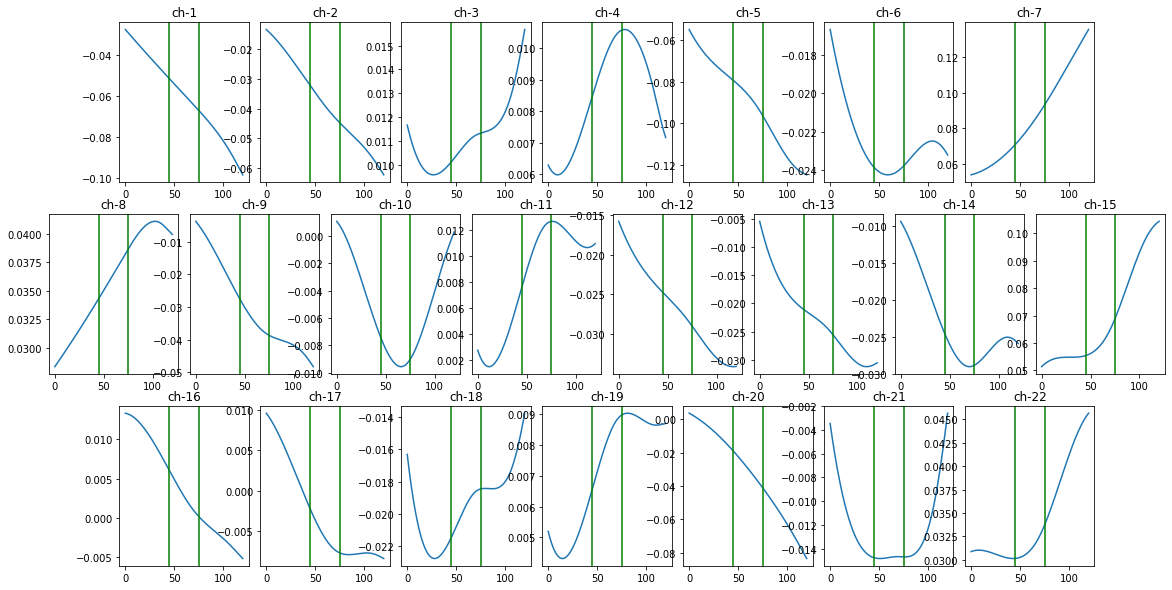

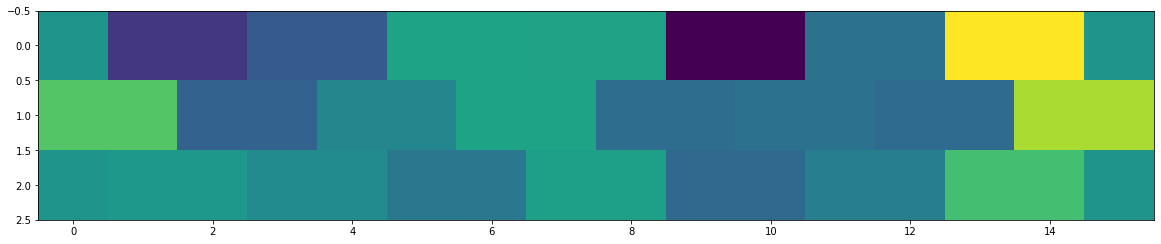



Trial count -> 2


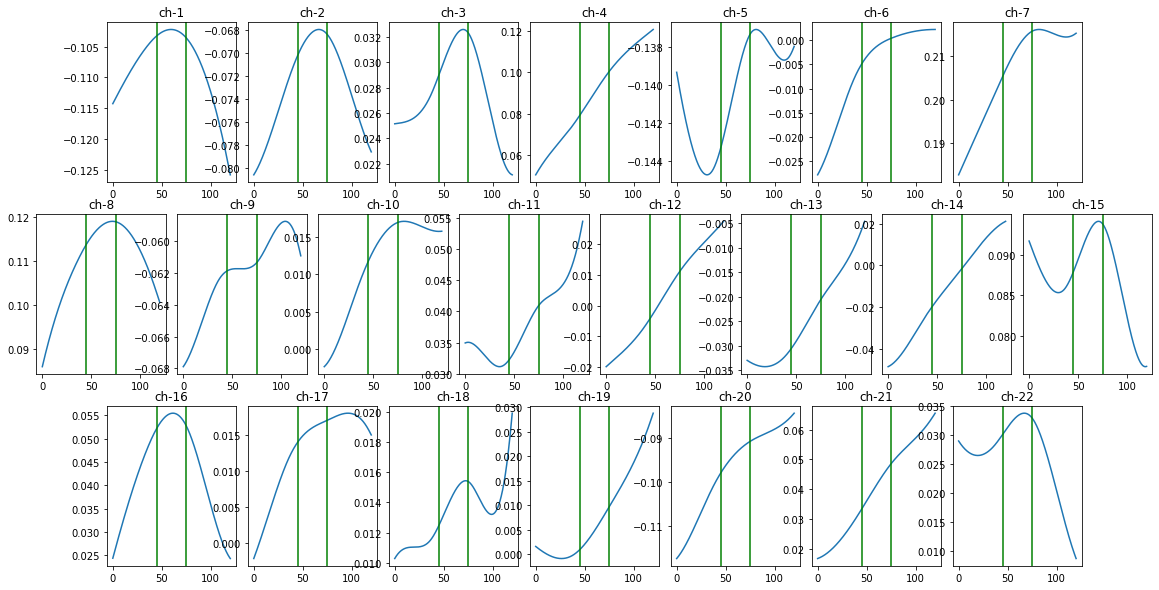

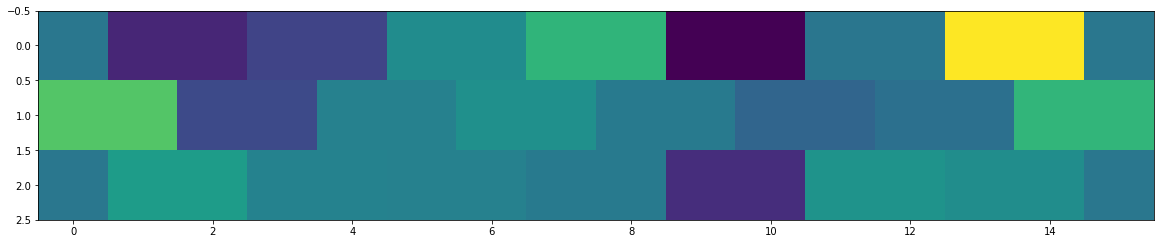



Trial count -> 3


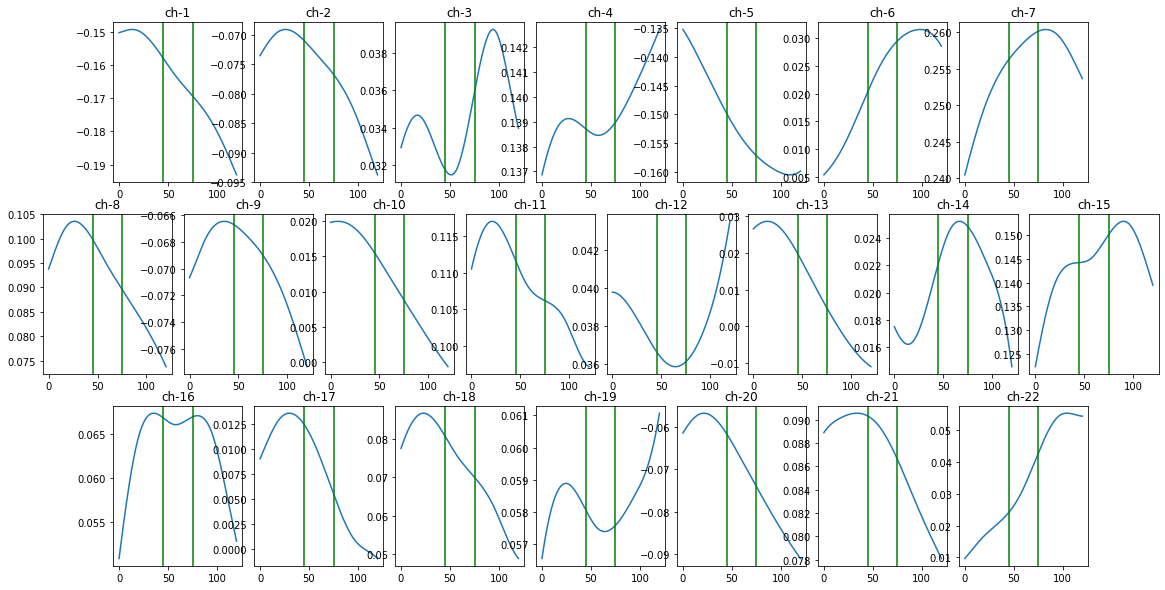

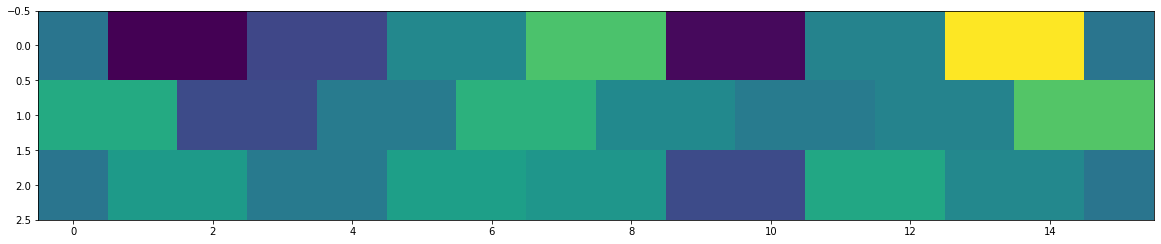



Trial count -> 4


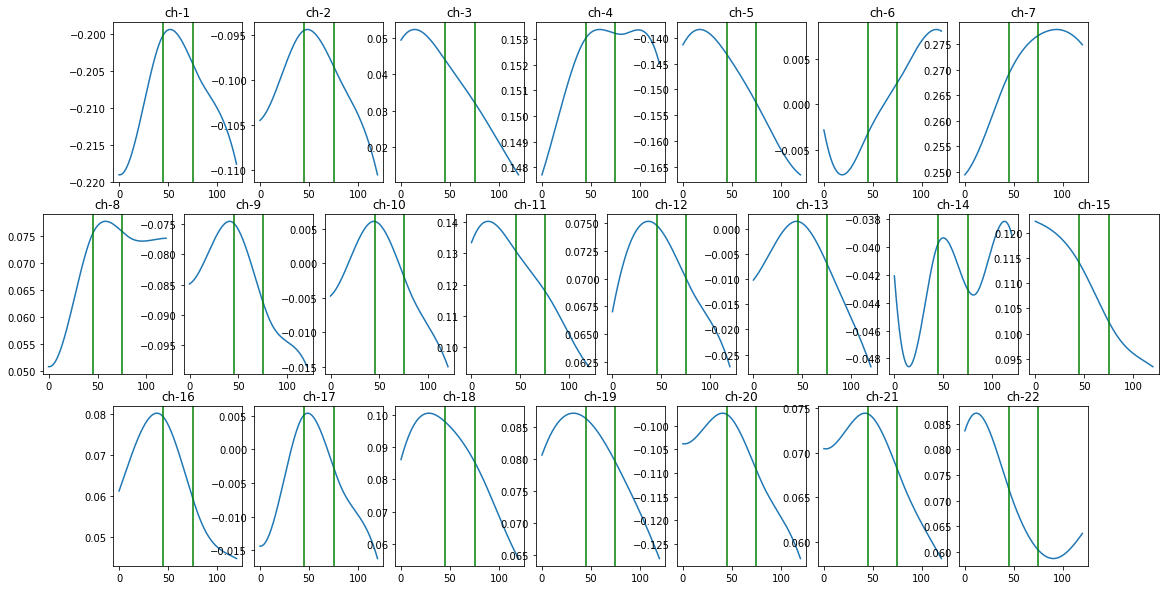

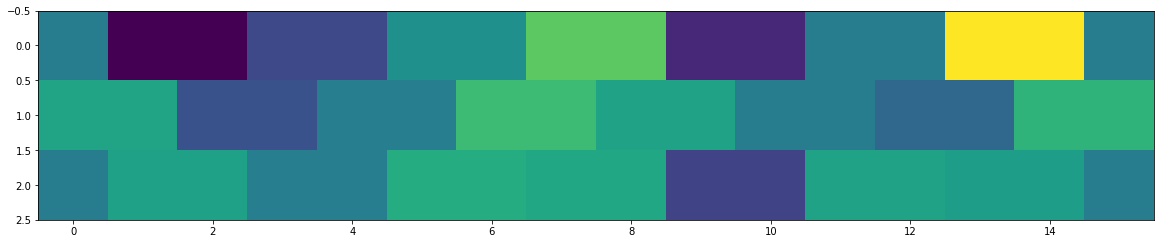



Trial count -> 5


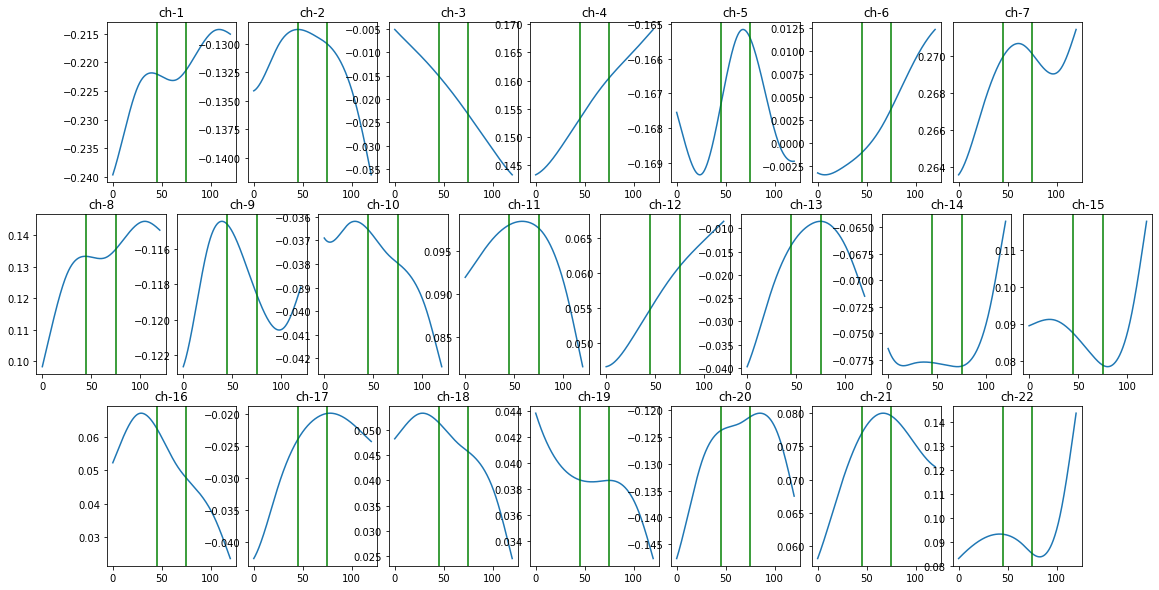

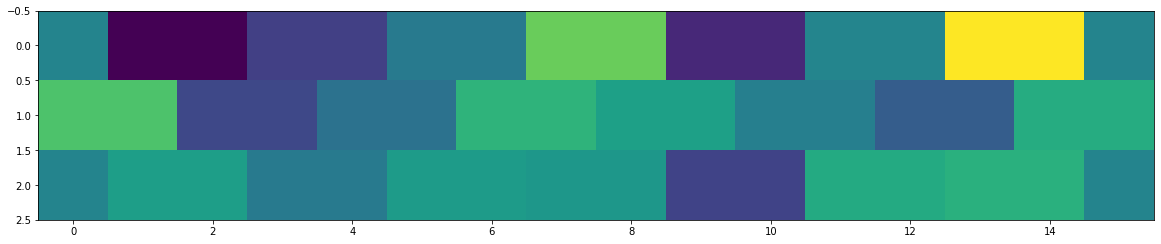



Trial count -> 6


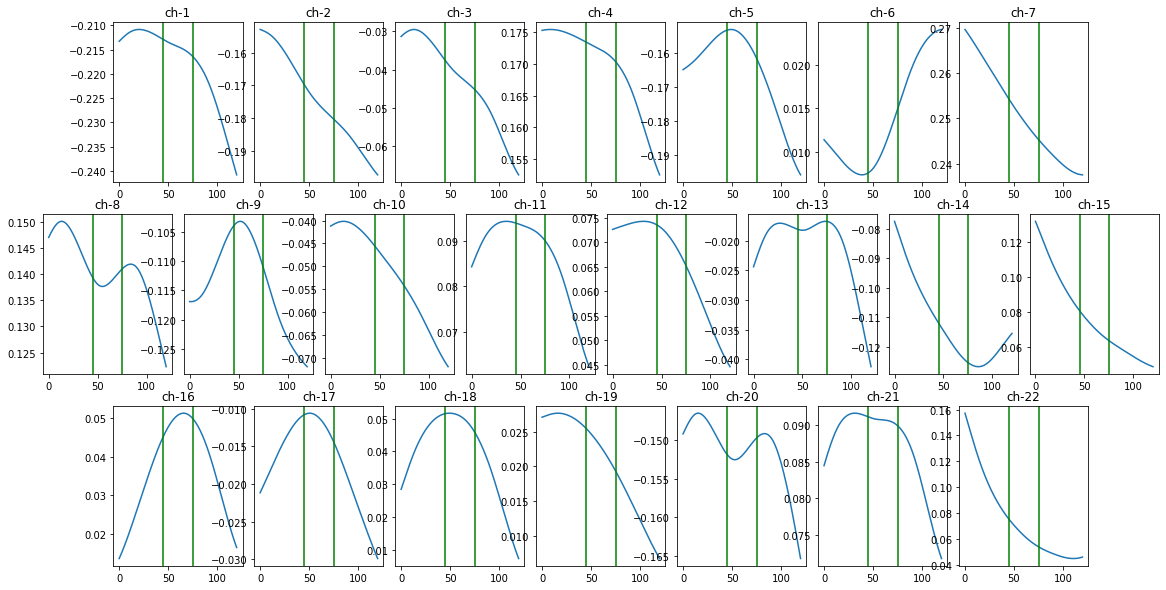

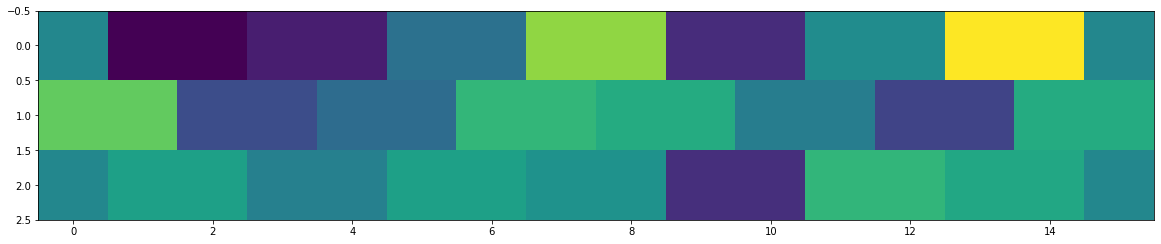



Trial count -> 7


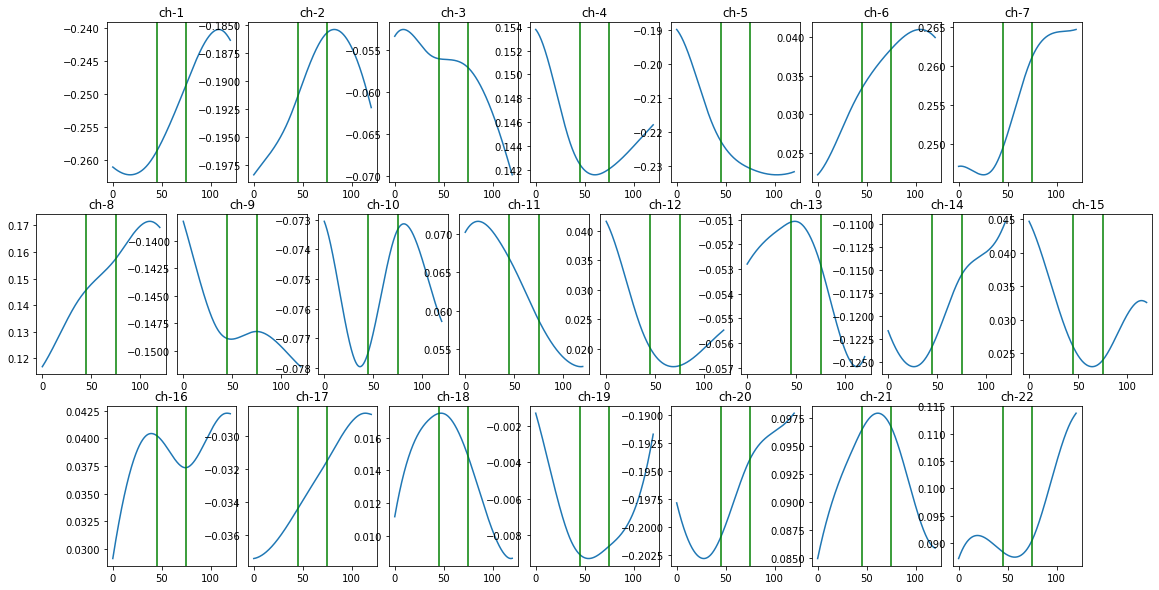

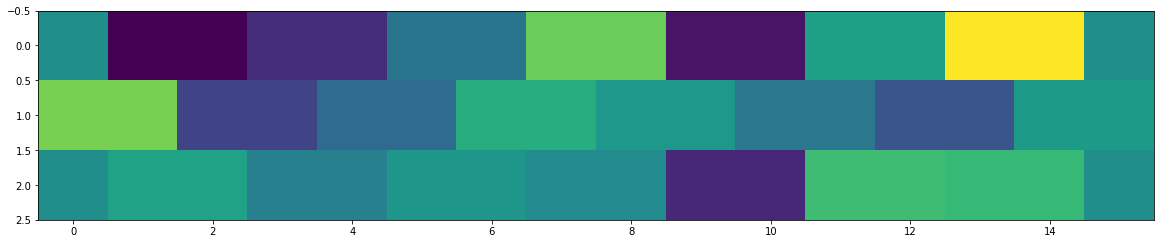



Trial count -> 8


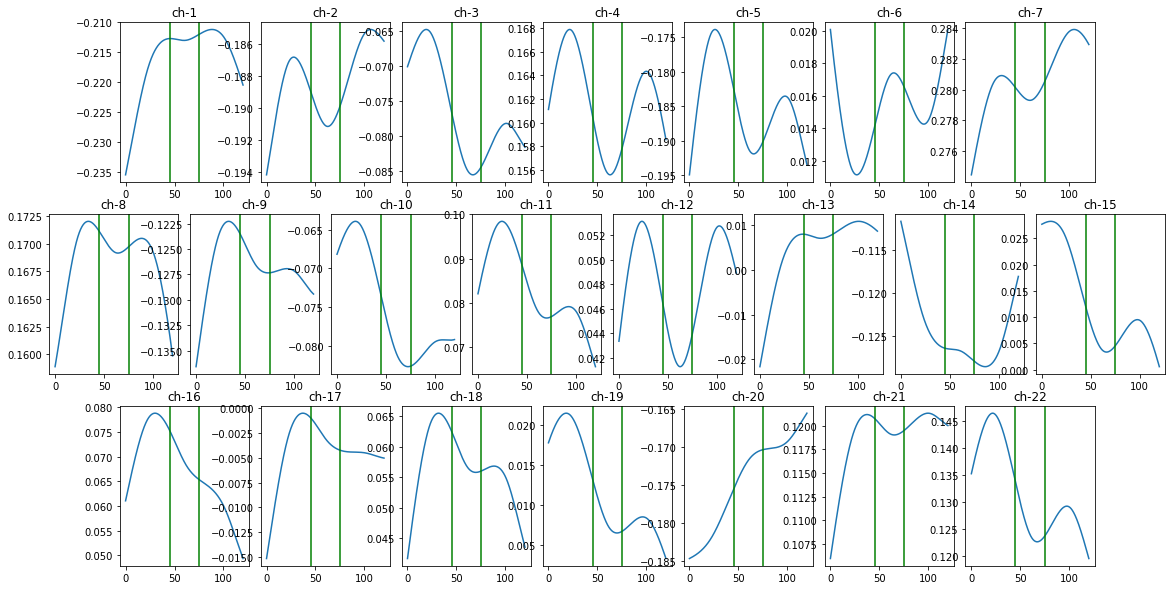

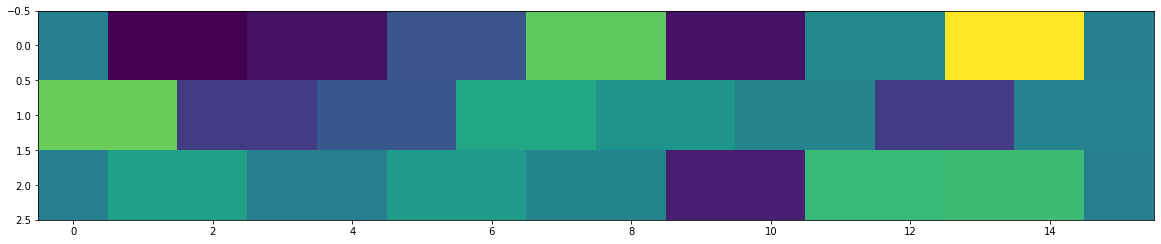



Trial count -> 9


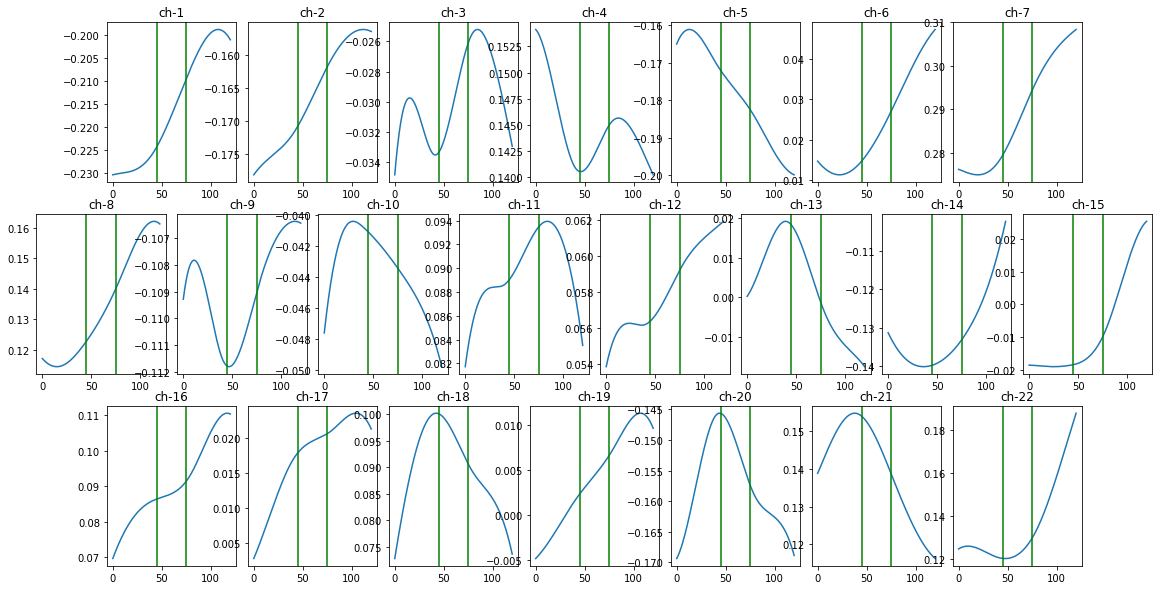

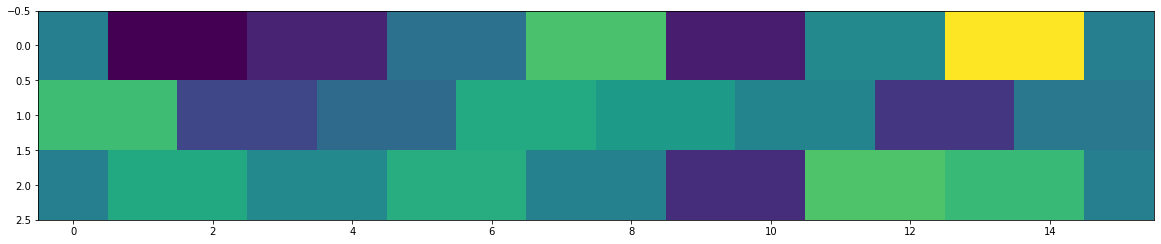



Trial count -> 10


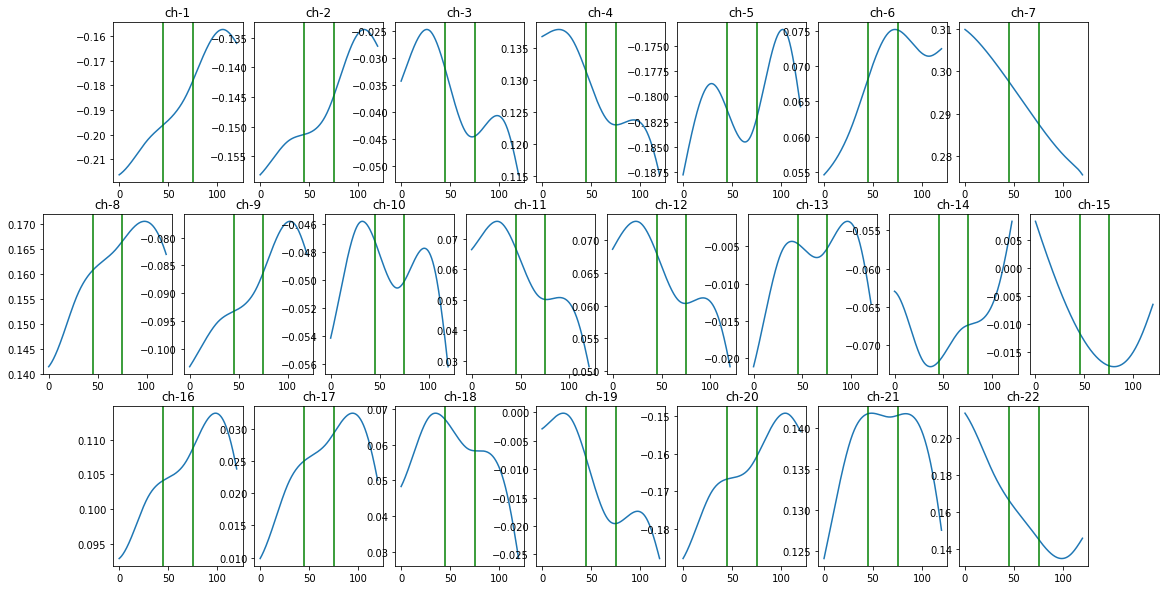

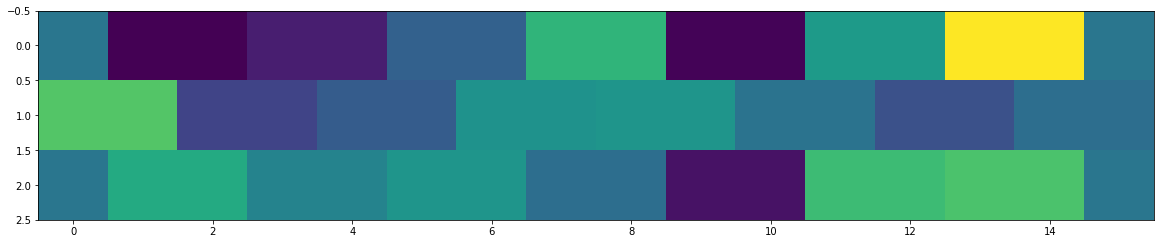



Z-normalized Oxy-Hb data


,time,trial_count,trial_category,ch-1,ch-2,ch-3,ch-4,ch-5,ch-6,ch-7,...,ch-13,ch-14,ch-15,ch-16,ch-17,ch-18,ch-19,ch-20,ch-21,ch-22
0,54.450,1,task,1.72545,1.70804,1.69062,1.67321,1.65581,1.6384,1.62099,...,1.5166,1.49921,1.48182,1.46443,1.44704,1.42965,1.41227,1.39488,1.3775,1.36012
1,54.600,1,task,1.34274,1.32536,1.30799,1.29061,1.27324,1.25587,1.2385,...,1.13431,1.11695,1.09959,1.08224,1.06488,1.04752,1.03017,1.01282,0.995468,0.978119
2,54.750,1,task,0.96077,0.943423,0.926077,0.908732,0.891388,0.874046,0.856705,...,0.75268,0.735346,0.718013,0.700682,0.683351,0.666021,0.648693,0.631365,0.614038,0.596712
3,54.900,1,task,0.579387,0.562064,0.54474,0.527418,0.510097,0.492776,0.475457,...,0.371556,0.354242,0.336928,0.319616,0.302304,0.284993,0.267682,0.250372,0.233063,0.215754
4,55.050,1,task,0.198446,0.181139,0.163832,0.146525,0.12922,0.111915,0.09461,...,-0.00920714,-0.0265084,-0.0438092,-0.0611096,-0.0784096,-0.0957092,-0.113008,-0.130307,-0.147606,-0.164904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1644.75,10,task,0.159783,0.142931,0.126084,0.109239,0.0923966,0.0755563,0.0587176,...,-0.042314,-0.0591573,-0.0760034,-0.0928529,-0.109706,-0.126564,-0.143426,-0.160294,-0.177168,-0.194048
1996,1644.9,10,task,-0.210936,-0.22783,-0.244733,-0.261645,-0.278566,-0.295496,-0.312436,...,-0.414322,-0.431349,-0.44839,-0.465445,-0.482517,-0.499604,-0.516708,-0.533829,-0.550967,-0.568124
1997,1645.05,10,task,-0.585299,-0.602493,-0.619707,-0.636942,-0.654197,-0.671473,-0.688771,...,-0.793047,-0.810513,-0.828005,-0.845523,-0.863068,-0.880641,-0.898242,-0.915872,-0.933529,-0.951213
1998,1645.2,10,task,-0.968921,-0.986655,-1.00441,-1.02219,-1.03999,-1.05781,-1.07564,...,-1.183,-1.20093,-1.21888,-1.23683,-1.2548,-1.27276,-1.29074,-1.30872,-1.3267,-1.34468




Oxy-Hb mean with questionnaire results


,trial_count,ch-1,ch-2,ch-3,ch-4,ch-5,ch-6,ch-7,ch-8,ch-9,...,image_name,q1,q2,q3,q4,q5,q6,q7,q8,q9
0,1,-0.059360,-0.038910,0.010825,0.009747,-0.086761,-0.024086,0.081307,0.036485,-0.034081,...,0713_1.jpg,5,5,5,5,5,4,5,5,3
1,2,-0.102598,-0.068583,0.031437,0.089959,-0.140075,-0.001621,0.211542,0.117485,-0.061712,...,0713_2.jpg,3,3,3,3,3,3,3,2,3
2,3,-0.163915,-0.073764,0.032771,0.138591,-0.153890,0.025612,0.258480,0.094612,-0.067716,...,0713_3.jpg,2,2,3,2,3,3,3,2,1
3,4,-0.200715,-0.095726,0.038156,0.153283,-0.147749,-0.000299,0.273673,0.076891,-0.080505,...,0713_4.jpg,2,2,3,2,3,3,2,2,2
4,5,-0.222633,-0.129205,-0.019028,0.157016,-0.165795,0.001064,0.270470,0.133268,-0.116387,...,0713_5.jpg,4,4,4,4,4,4,4,4,4
5,6,-0.214455,-0.175505,-0.041638,0.172157,-0.155737,0.010481,0.249593,0.138785,-0.105457,...,0713_6.jpg,5,5,5,5,5,3,5,5,4
6,7,-0.253839,-0.188118,-0.056355,0.141817,-0.227498,0.036094,0.255464,0.151537,-0.148615,...,0713_7.jpg,3,4,4,4,4,3,3,3,3
7,8,-0.212752,-0.190509,-0.083162,0.156985,-0.189307,0.016489,0.279673,0.169718,-0.126051,...,0713_8.jpg,2,1,2,2,2,2,3,2,1
8,9,-0.217187,-0.166332,-0.029972,0.142355,-0.177230,0.020373,0.286537,0.130664,-0.110802,...,0713_9.jpg,1,1,3,2,2,3,2,1,1
9,10,-0.188846,-0.149228,-0.040287,0.126008,-0.183470,0.072905,0.292556,0.163456,-0.090804,...,0713_10.jpg,4,4,4,4,4,4,4,4,4


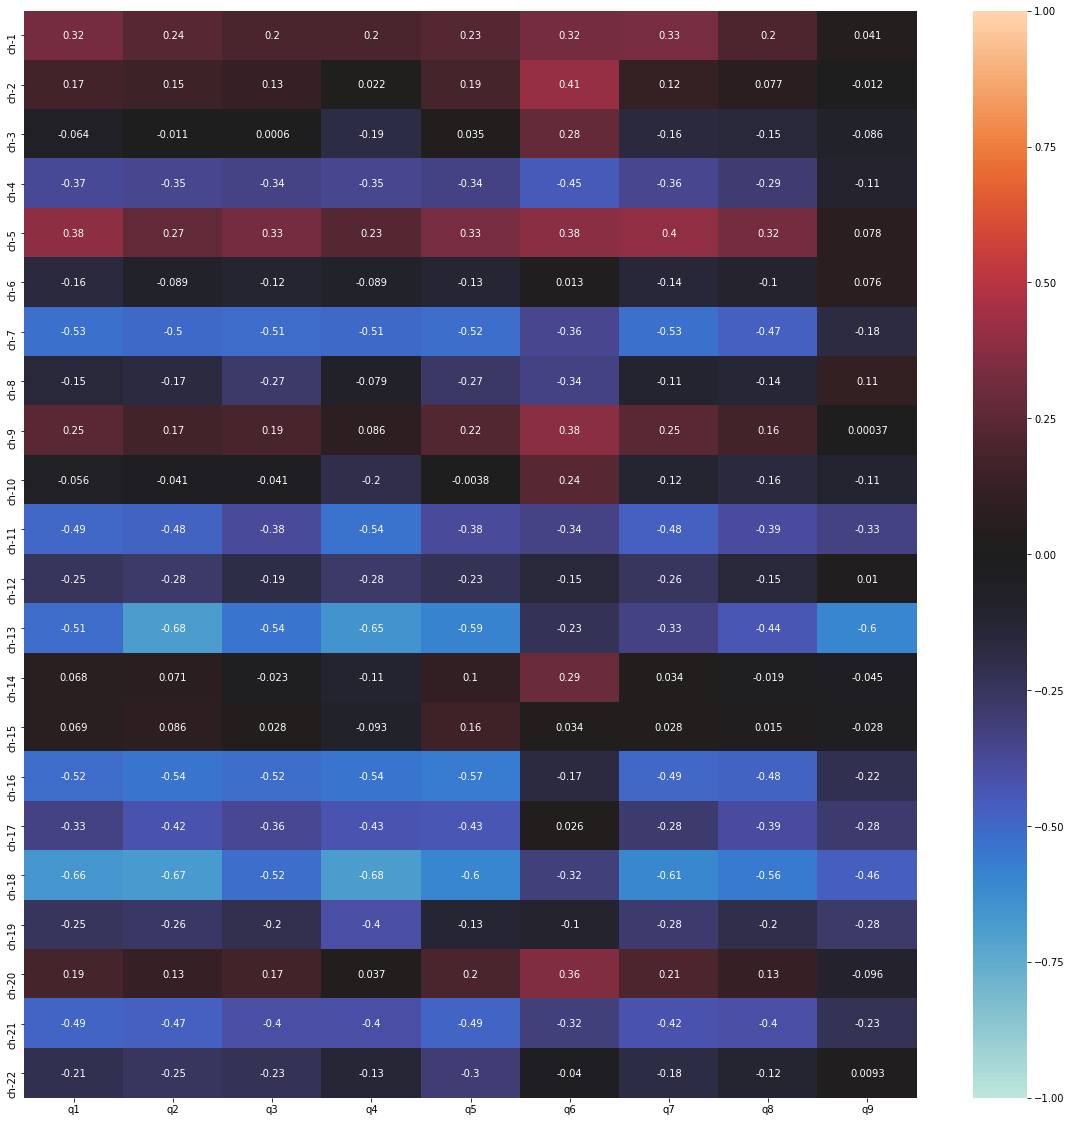



Oxy-Hb variations with questionnaire results


,trial_count,ch-1,ch-2,ch-3,ch-4,ch-5,ch-6,ch-7,ch-8,ch-9,...,image_name,q1,q2,q3,q4,q5,q6,q7,q8,q9
0,1,-0.015464,-0.012395,0.001204,0.002098,-0.016867,0.000078,0.022148,0.004336,-0.011072,...,0713_1.jpg,5,5,5,5,5,4,5,5,3
1,2,-0.000337,0.001789,0.003348,0.021081,0.005999,0.005261,0.010384,0.005126,0.000503,...,0713_2.jpg,3,3,3,3,3,3,3,2,3
2,3,-0.011333,-0.005706,0.004144,0.000268,-0.007183,0.009040,0.003835,-0.010183,-0.002293,...,0713_3.jpg,2,2,3,2,3,3,3,2,1
3,4,-0.003808,-0.003933,-0.011555,0.000166,-0.009394,0.005519,0.007478,0.000398,-0.013029,...,0713_4.jpg,2,2,3,2,3,3,2,2,2
4,5,0.000714,-0.001264,-0.008189,0.007223,0.001939,0.004729,0.000195,0.002242,-0.003950,...,0713_5.jpg,4,4,4,4,4,4,4,4,4
5,6,-0.003457,-0.010431,-0.007552,-0.003062,-0.008142,0.007336,-0.008802,0.001690,-0.007024,...,0713_6.jpg,5,5,5,5,5,3,5,5,4
6,7,0.010111,0.005648,-0.001062,-0.000396,-0.007969,0.005106,0.011604,0.011567,0.000644,...,0713_7.jpg,3,4,4,4,4,3,3,3,3
7,8,0.000684,-0.000952,-0.007902,-0.002760,-0.007761,0.002522,0.000393,-0.001422,-0.003820,...,0713_8.jpg,2,1,2,2,2,2,3,2,1
8,9,0.014650,0.008945,0.007227,0.004423,-0.010385,0.012204,0.014853,0.017142,0.002745,...,0713_9.jpg,1,1,3,2,2,3,2,1,1
9,10,0.017550,0.006370,-0.012525,-0.008220,-0.000899,0.006857,-0.009837,0.005743,0.006900,...,0713_10.jpg,4,4,4,4,4,4,4,4,4


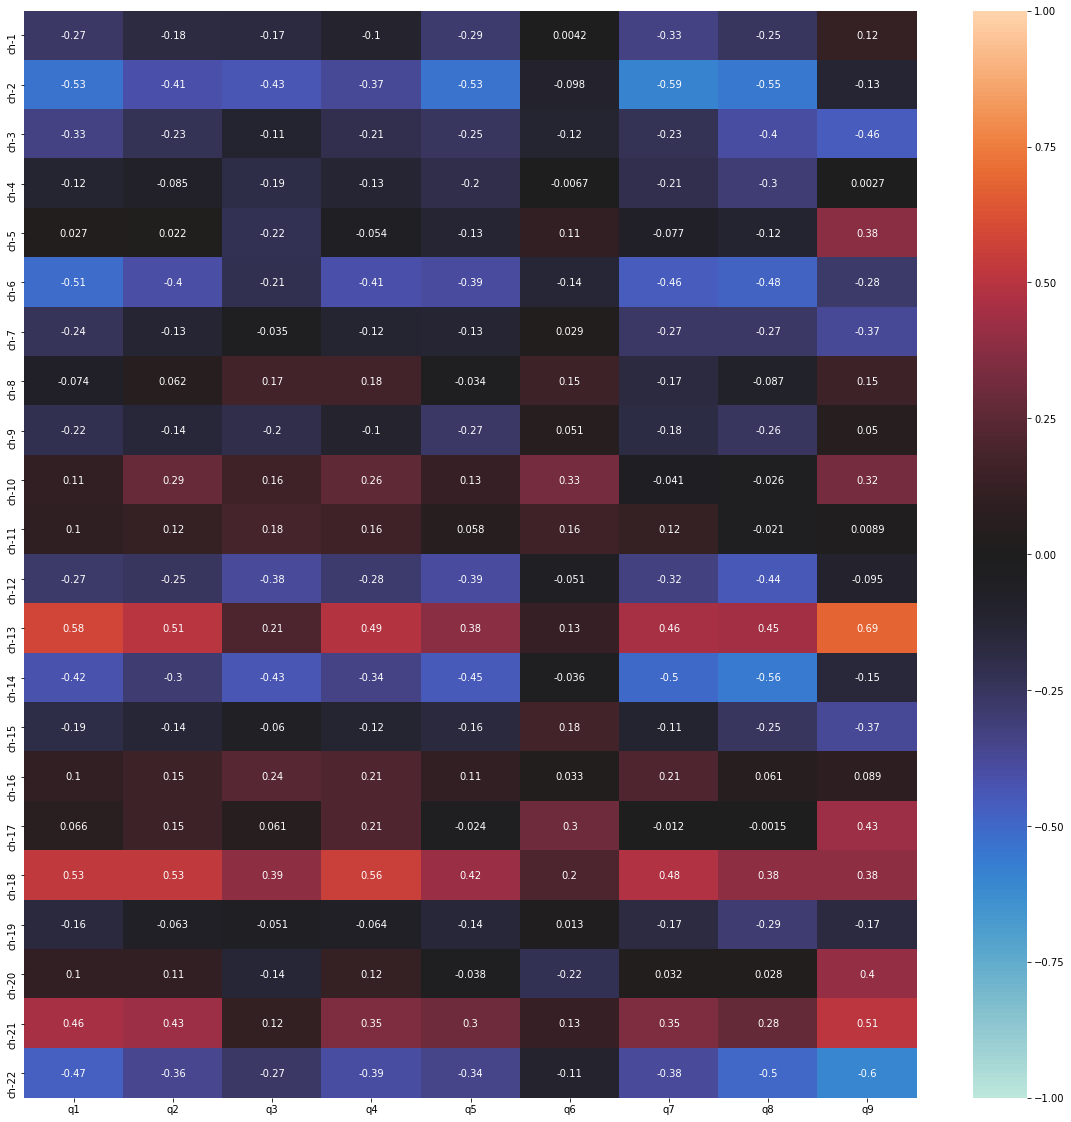

In [14]:
# define constants.
measurement_period = 0.15     # [sec]
preceding_rest_duration = 45  # [sec]
task_duration = 30            # [sec]
following_rest_duration = 45  # [sec]
num_preceding_rest_samples = int(preceding_rest_duration/measurement_period)
num_task_samples = int(task_duration/measurement_period)
num_following_rest_samples = int(following_rest_duration/measurement_period)
num_trial_samples = num_preceding_rest_samples + num_task_samples + num_following_rest_samples
num_columns = 70
separation_char = '\t'
data_table_start_row_index = 33
# marker_string = "1"
nirs_data_filepath = './experimental_data/nirs/0713-main.TXT'
questionnaire_data_filepath = './experimental_data/questionnaire/0713.csv'

# load nirs data and make (temporary) dataframe object
temporary_names = np.arange(num_columns).astype(str)
temporary_df = pd.read_csv(nirs_data_filepath, names=temporary_names, sep=separation_char)
# print("temporary dataframe")
# display(temporary_df)

# load questionnare data and create dataframe object
questionnaire_df = pd.read_csv(
    questionnaire_data_filepath, 
    index_col=0, 
     header=0,
    names=['image_name', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9']
)
questionnaire_df.insert(0, 'trial_count', (np.arange(len(questionnaire_df))+1).astype(str))
print('\n\nQuestionnaire results')
display(questionnaire_df)

# create dataframe object that contains oxy-hb data
oxy_data = temporary_df[[temporary_names[0], temporary_names[2], *temporary_names[4::3]]][data_table_start_row_index:].values
channel_names = [label.replace(' ', '') for label in oxy_data[0][2:]]
oxy_df_column_labels = [*oxy_data[1][:2], *channel_names]
oxy_df = pd.DataFrame(oxy_data[2:], columns=oxy_df_column_labels)
cast_dict = {}
for channel_name in channel_names:
    cast_dict[channel_name] = float
oxy_df.astype(cast_dict)

# find marker index where its value is not equal to <marker_string>
finding_marker_query_statement = 'Mark !=0 and Mark !="0"'
marker_indexes = oxy_df.query(finding_marker_query_statement).index.values
marker_differences = marker_indexes[1:] - marker_indexes[:-1]
marker_period_threshold = 120/measurement_period
valid_marker_boolean_indexes = [*(marker_differences > marker_period_threshold), True]
marker_indexes = marker_indexes[valid_marker_boolean_indexes]
num_trials = marker_indexes.shape[0]
print('\n\nMarker indexes -> {}'.format(marker_indexes))
# print('\n\n')

trial_counts = np.zeros(len(oxy_df))
trial_categories = np.full(len(oxy_df), '', dtype=object)
for i, marker_index in enumerate(marker_indexes):
    trial_counts[marker_index:] = i+1
    trial_categories[marker_index:marker_index+num_preceding_rest_samples] = 'preceding_rest'
    trial_categories[marker_index+num_preceding_rest_samples:marker_index+num_preceding_rest_samples+num_task_samples] = 'task'
    trial_categories[marker_index+num_preceding_rest_samples+num_task_samples:marker_index+num_preceding_rest_samples+num_task_samples+num_following_rest_samples] = 'following_rest'
    trial_categories[marker_index+num_preceding_rest_samples+num_task_samples+num_following_rest_samples:] = 'questionnaire'
oxy_df.insert(1, 'trial_count', trial_counts.astype(int))
oxy_df.insert(2, 'trial_category', trial_categories)
oxy_df = oxy_df.drop('Mark', axis=1)
oxy_df = oxy_df.rename(columns={'Time(sec)': 'time'})
print('\n\nOxy-Hb data')
display(oxy_df)

# denoise data 
# to denoise data, use multi resolution analysis
oxy_df_column_labels = oxy_df.columns.values
info_labels = oxy_df_column_labels[:3]
oxy_value_labels = oxy_df_column_labels[3:]
info_values = oxy_df[info_labels].values
oxy_values = oxy_df[oxy_value_labels].values.astype(float).T
num_paddings = 2**14-oxy_values.shape[1]
wavelet_input = np.pad(oxy_values, [(0,0),(0,num_paddings)])
count = 0
period = 0.15
frequency = 1/period
denoised_oxy_values = np.zeros(wavelet_input.shape)
resample_x = np.linspace(0, wavelet_input.shape[1], wavelet_input.shape[1])
while wavelet_input.shape[1] > 10:
    count += 1
    period *= 2
    frequency = 1/period
    wavelet_output = wavelet_input[:, 0::2] + (wavelet_input[:, 1::2] - wavelet_input[:, 0::2])/2
    wavelet_input = wavelet_output
    if frequency < 0.04:
        resampled_wavelet_output = np.zeros(denoised_oxy_values.shape)
        for i, wavelet_output_per_channel in enumerate(wavelet_output):
            x = np.linspace(0, resample_x.shape[0], wavelet_output_per_channel.shape[0])
            interpolated_wavelet_output_per_channel = interpolate.interp1d(x, wavelet_output_per_channel, kind='cubic')
            resampled_wavelet_output[i] = interpolated_wavelet_output_per_channel(resample_x)
#         print('resampled_wavelet_output -> {}'.format(resampled_wavelet_output.shape))
#         plt.plot(resampled_wavelet_output[0])
#         plt.show()
        denoised_oxy_values += resampled_wavelet_output
denoised_oxy_values = np.hstack([info_values, denoised_oxy_values.T[:-num_paddings]])
denoised_oxy_df = pd.DataFrame(
    denoised_oxy_values,
    columns=oxy_df_column_labels
)
print('\n\nDenoised Oxy-Hb data')
display(denoised_oxy_df)

# for each trial, caluculate z-scores of task samples and create dataframe.
z_normalized_task_samples_list = []
means_list = []
variations_list = []
task_infomations_list = []
for trial_count in range(1, num_trials+1):
    query_statement = 'trial_count == {}'.format(trial_count)
    denoised_oxy_df_while_trial = denoised_oxy_df.query(query_statement)
    query_statement = 'trial_count == {} and trial_category == "preceding_rest"'.format(trial_count)
    denoised_oxy_df_while_preseding_rest = denoised_oxy_df.query(query_statement)
    query_statement = 'trial_count == {} and trial_category == "task"'.format(trial_count)
    denoised_oxy_df_while_task = denoised_oxy_df.query(query_statement)
    task_infomations = denoised_oxy_df_while_task[info_labels].values
    task_infomations_list.append(task_infomations)
    denoised_task_samples = denoised_oxy_df_while_task[oxy_value_labels].values.astype(float).T
    denoised_task_sample_means = np.mean(denoised_task_samples, axis=1)
    denoised_task_sample_stds = np.std(denoised_task_samples, axis=1)
    z_normalized_task_samples = np.zeros(denoised_task_samples.shape)
    for i in range(denoised_task_samples.shape[0]):
        z_normalized_task_samples[i] = (denoised_task_samples[i]-denoised_task_sample_means[i])/denoised_task_sample_stds[i]
    z_normalized_task_samples_list.append(z_normalized_task_samples)
    
    # visualize data
    print('\n\nTrial count -> {}'.format(trial_count))
    fig = plt.figure(figsize=(20,10))
    second_row_start_index = 7
    third_row_start_index = 15
    for i, channel_label in enumerate(oxy_value_labels):
        samples = denoised_oxy_df_while_trial[channel_label].values[:num_trial_samples]
        times = np.linspace(0, 120, samples.shape[0])
        if i < second_row_start_index :
            ax = plt.subplot2grid((3, 16), (0, 2*i+1), rowspan=1, colspan=2)
        elif second_row_start_index <= i and i <= 14:
            ax = plt.subplot2grid((3, 16), (1, 2*(i-second_row_start_index)), rowspan=1, colspan=2)
        elif third_row_start_index <= i:
            ax = plt.subplot2grid((3, 16), (2, 2*(i-third_row_start_index)+1), rowspan=1, colspan=2)
        ax.plot(times, samples)
        ax.axvline(x=times[num_preceding_rest_samples], color='green')
        ax.axvline(x=times[num_preceding_rest_samples+num_task_samples], color='green')
        ax.set_title(channel_label)
    plt.show()
    all_channel_samples = denoised_oxy_df_while_task[oxy_value_labels].values.T
    means = np.mean(all_channel_samples, axis=1)
    means_list.append(means)
    variations = all_channel_samples[:, -1] - all_channel_samples[:, 0]
    variations_list.append(variations)
    reshaped_means = np.zeros([3, 16])
    reshaped_means[0,1:15:2] = means[:7]
    reshaped_means[0,2:16:2] = means[:7]
    reshaped_means[1,0::2] = means[7:15]
    reshaped_means[1,1::2] = means[7:15]
    reshaped_means[2,1:15:2] = means[15:]
    reshaped_means[2,2:16:2] = means[15:]
    plt.figure(figsize=(20,10))
    plt.imshow(reshaped_means*255)
    plt.show()
    
z_normalized_task_samples_array = np.reshape(np.array(z_normalized_task_samples_list), [2000, 22])
task_infomations_array = np.reshape(np.array(task_infomations_list), [2000, 3])
z_normalized_task_sample_df = pd.DataFrame(
    np.hstack([task_infomations_array, z_normalized_task_samples_array]),
    columns=oxy_df_column_labels
)
print('\n\nZ-normalized Oxy-Hb data')
display(z_normalized_task_sample_df)

means_array = np.array(means_list).astype(float)
mean_df = pd.DataFrame(
    means_array,
    columns=oxy_value_labels
)
mean_df.insert(0, 'trial_count', (np.arange(len(questionnaire_df))+1).astype(str))
# print('\n\nOxy-Hb mean')
# display(mean_df)
mean_with_questionnaire_df = pd.merge(mean_df, questionnaire_df, on='trial_count')
print('\n\nOxy-Hb mean with questionnaire results')
display(mean_with_questionnaire_df)
# print('\n\nCorrelations between questionnaire results and Oxy-Hb mean values')
questionnaire_and_mean_correlations = mean_with_questionnaire_df.corr()[questionnaire_df.columns.values[2:]][:22]
plt.figure(figsize=(20,20))
sns.heatmap(questionnaire_and_mean_correlations, vmax=1, vmin=-1, center=0, annot=True)
plt.show()


variations_array = np.array(variations_list).astype(float)
variation_df = pd.DataFrame(
    variations_array,
    columns=oxy_value_labels
)
variation_df.insert(0, 'trial_count', (np.arange(len(questionnaire_df))+1).astype(str))
variation_with_questionnaire_df = pd.merge(variation_df, questionnaire_df, on='trial_count')
print('\n\nOxy-Hb variations with questionnaire results')
display(variation_with_questionnaire_df)
# print('\n\nCorrelations between questionnaire results and Oxy-Hb mean values')
questionnaire_and_variation_correlations = variation_with_questionnaire_df.corr()[questionnaire_df.columns.values[2:]][:22]
plt.figure(figsize=(20,20))
sns.heatmap(questionnaire_and_variation_correlations, vmax=1, vmin=-1, center=0, annot=True)
plt.show()
    